In [1]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from detecto.core import Dataset
from detecto.utils import read_image
from detecto.utils import xml_to_csv
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import torch
from torchvision import transforms

'Add shortcut to drive' on Internship folder. 

In [3]:

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
os.listdir('/content/drive/MyDrive/Internship/')

FileNotFoundError: ignored

In [7]:
test_dir=r"/content/drive/MyDrive/Internship/test/test_labels_2.csv"
Test_dataset = core.Dataset(test_dir)

In [8]:
train_dir=r"/content/drive/MyDrive/Internship/train/train_labels_2.csv"
Train_dataset=core.Dataset(train_dir)

In [9]:
#Proper solution taking in classes which are in dataset. Will take a long time.
"""
classes_list=list()
for i in Train_dataset:
  images,targets=i
  L=targets['labels']
  for j in L:
    if(j not in classes_list):
      classes_list.append(j)
"""

"\nclasses_list=list()\nfor i in Train_dataset:\n  images,targets=i\n  L=targets['labels']\n  for j in L:\n    if(j not in classes_list):\n      classes_list.append(j)\n"

In [10]:
#Temporary solution taking in classes from folder itelf. Only applicable if clean dataset. Else discrepancy between dataset classes and directory classes
#Way faster
clist=list()
file_list=next(os.walk(train_dir))[2]
file_list=[x for x in file_list if x!='train_labels_2.csv']
for i in file_list:
  name=" ".join(os.path.splitext(i)[0].split()[:-1])
  if(name not in clist):
    clist.append(name)

StopIteration: ignored

In [11]:
#torch.cuda.empty_cache() #Run if facing memory issues. It will flush existing tensor objects so use carefully.
loader=core.DataLoader(Train_dataset, batch_size=1, shuffle=True)#L3
model = core.Model(classes_list)
losses = model.fit(loader, Test_dataset, epochs=25, lr_step_size=5, learning_rate=0.001, verbose=True)#L5
model.save('/content/drive/MyDrive/model_weights.pth')

ValueError: ignored

In [12]:
base_path="/content/drive/MyDrive/Analysed_Internship2022/Images/"
sample_img="8.jpg"
image=read_image(base_path+sample_img)
plt.imshow(image)
plt.show()

ValueError: ignored

In [13]:
from detecto.visualize import show_labeled_image
image,targets=dataset[1]
show_labeled_image(image,targets['boxes'],targets['labels'])

NameError: ignored

In [14]:
from detecto.core import DataLoader,Model
labels=["Cham Cham","Kebab","Turkey Sandwich","Lentil"]
model=Model(labels)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [15]:
model.fit(dataset,epochs=10,learning_rate=0.0005,verbose="auto")

NameError: ignored

In [ ]:
#image=read_image(base_path+"Asiago Turkey Sandwich _ Butterball®.jpg")
image=read_image("/content/test3.jpg")
labels,boxes,scores=model.predict(image)

In [ ]:
print("Labels: ",labels)
print("Boxes: ",boxes)
print("Scores: ",scores)

Labels:  ['Kebab', 'Turkey Sandwich', 'Lentil', 'Turkey Sandwich', 'Turkey Sandwich', 'Lentil', 'Turkey Sandwich', 'Lentil', 'Cham Cham', 'Kebab', 'Turkey Sandwich', 'Turkey Sandwich', 'Kebab', 'Lentil', 'Turkey Sandwich', 'Lentil', 'Kebab', 'Turkey Sandwich', 'Kebab', 'Turkey Sandwich', 'Lentil', 'Kebab', 'Kebab', 'Kebab', 'Kebab', 'Kebab', 'Cham Cham', 'Lentil', 'Turkey Sandwich', 'Cham Cham', 'Lentil', 'Cham Cham', 'Lentil', 'Kebab', 'Cham Cham', 'Cham Cham', 'Turkey Sandwich', 'Turkey Sandwich', 'Lentil', 'Lentil', 'Turkey Sandwich', 'Kebab', 'Turkey Sandwich', 'Turkey Sandwich', 'Cham Cham', 'Kebab', 'Cham Cham', 'Lentil', 'Cham Cham', 'Lentil', 'Lentil', 'Lentil', 'Cham Cham', 'Turkey Sandwich', 'Cham Cham']
Boxes:  tensor([[1.8598e+02, 1.0791e+02, 6.1200e+02, 4.0399e+02],
        [2.6329e+02, 9.6935e+01, 6.1200e+02, 4.0800e+02],
        [1.0470e+02, 0.0000e+00, 6.1200e+02, 3.7060e+02],
        [1.6183e+02, 2.3345e+02, 6.1200e+02, 4.0800e+02],
        [0.0000e+00, 5.2385e+01, 6.1

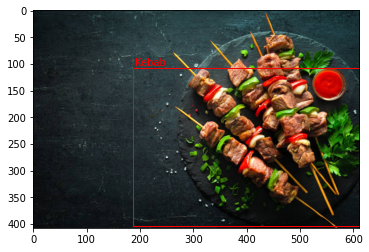

In [ ]:
from detecto.visualize import show_labeled_image
show_labeled_image(image,boxes[0],labels[0])

In [ ]:
image=read_image("/content/test1.jpg")
labels,boxes,scores=model.predict(image)

In [ ]:
print("Labels: ",labels)
print("Boxes: ",boxes)
print("Scores: ",scores)

Labels:  ['Turkey Sandwich', 'Turkey Sandwich', 'Kebab', 'Turkey Sandwich', 'Turkey Sandwich', 'Cham Cham', 'Lentil', 'Turkey Sandwich', 'Lentil', 'Turkey Sandwich', 'Lentil', 'Lentil', 'Turkey Sandwich', 'Turkey Sandwich', 'Cham Cham', 'Lentil', 'Turkey Sandwich', 'Kebab', 'Cham Cham', 'Lentil', 'Lentil', 'Lentil', 'Cham Cham', 'Lentil', 'Kebab', 'Kebab', 'Turkey Sandwich', 'Lentil', 'Kebab', 'Cham Cham', 'Kebab', 'Turkey Sandwich', 'Kebab', 'Turkey Sandwich', 'Cham Cham', 'Cham Cham', 'Cham Cham', 'Lentil', 'Cham Cham', 'Kebab', 'Turkey Sandwich', 'Lentil', 'Lentil', 'Kebab', 'Kebab', 'Lentil']
Boxes:  tensor([[5.2095e+01, 9.9083e+01, 2.7328e+02, 1.6800e+02],
        [5.7431e+01, 2.6701e+01, 2.9074e+02, 1.3469e+02],
        [1.8824e+01, 2.8081e+01, 2.8357e+02, 1.6800e+02],
        [0.0000e+00, 4.7951e+01, 2.5899e+02, 1.6800e+02],
        [1.3453e+02, 3.7909e+01, 2.7783e+02, 1.6800e+02],
        [0.0000e+00, 2.9237e+00, 2.9900e+02, 1.6800e+02],
        [1.2780e+01, 3.2909e+01, 2.8923e

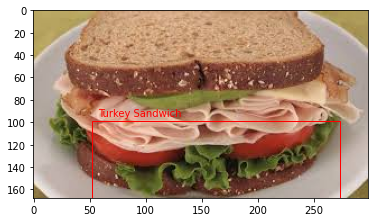

In [ ]:
from detecto.visualize import show_labeled_image
show_labeled_image(image,boxes[0],labels[0])

In [ ]:
image=read_image("/content/test4.jpg")
labels,boxes,scores=model.predict(image)

In [ ]:
print("Labels: ",labels)
print("Boxes: ",boxes)
print("Scores: ",scores)

Labels:  ['Turkey Sandwich', 'Lentil', 'Turkey Sandwich', 'Cham Cham', 'Lentil', 'Turkey Sandwich', 'Lentil', 'Kebab', 'Turkey Sandwich', 'Kebab', 'Kebab', 'Kebab', 'Kebab', 'Cham Cham', 'Turkey Sandwich', 'Turkey Sandwich', 'Turkey Sandwich', 'Cham Cham', 'Lentil', 'Lentil', 'Lentil', 'Kebab', 'Turkey Sandwich', 'Cham Cham', 'Lentil', 'Turkey Sandwich', 'Lentil', 'Turkey Sandwich', 'Cham Cham', 'Cham Cham', 'Kebab', 'Kebab', 'Cham Cham', 'Cham Cham', 'Kebab', 'Cham Cham', 'Lentil', 'Turkey Sandwich', 'Lentil', 'Kebab', 'Kebab', 'Lentil']
Boxes:  tensor([[5.5653e+01, 3.1687e+00, 2.7738e+02, 1.2575e+02],
        [1.1703e+01, 0.0000e+00, 2.7119e+02, 1.5300e+02],
        [1.1303e+02, 3.7795e+01, 2.6057e+02, 1.4474e+02],
        [1.0069e+02, 0.0000e+00, 3.2900e+02, 1.5300e+02],
        [6.2673e+01, 3.2576e+00, 1.8227e+02, 1.4943e+02],
        [7.0665e+01, 1.0761e+01, 1.9515e+02, 1.5300e+02],
        [0.0000e+00, 7.5485e+00, 1.5054e+02, 1.5300e+02],
        [1.0933e+02, 0.0000e+00, 3.2852e+